<a href="https://colab.research.google.com/github/summer9/Saisfactory_Survey/blob/main/Data_Processing_with_Python_Groupwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dabase: WorkPlace satisfaction Survey

## 1.Data preprocessing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import openpyxl

In [ ]:
df = pd.read_csv("https://github.com/summer9/Saisfactory_Survey/raw/refs/heads/main/WorkPlaceSatisfactionSurveyData.csv")

### 1.1.Understand dataset:


- The survey was conducted by interviewing 82 employees in a company from 01.01.2023 to 20.02.2023
- The survey gathered employee feedback on workplace satisfaction, focusing on management, salary, work-life balance, and benefits such as healthcare, holidays, gym access, and muscle care programs.

- This survey aim to find out patterns of satisfactory across different employess group, to help the company improve working conditions and employee-wellbeing



### 1.2.Load the data.

In [ ]:
df.head()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [ ]:
df.columns


Index(['number', 'gender', 'age', 'family', 'education', 'years_of_service',
       'salary', 'sat_management', 'sat_colleques', 'sat_workingEnvironment',
       'sat_salary', 'sat_tasks', 'healtcare', 'holidayCabin', 'gym',
       'muscleCare'],
      dtype='object')

In [ ]:
# The names of the columns and the counts for them
df.count()

,0
number,82
gender,82
age,82
family,82
education,81
years_of_service,80
salary,82
sat_management,82
sat_colleques,81
sat_workingEnvironment,82


In [ ]:
# The amount of missing values
df.isnull().sum()

,0
number,0
gender,0
age,0
family,0
education,1
years_of_service,2
salary,0
sat_management,0
sat_colleques,1
sat_workingEnvironment,0


In [ ]:
# The Columns names, and the counts for non-null values and the data types respectively
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number                  82 non-null     int64  
 1   gender                  82 non-null     int64  
 2   age                     82 non-null     int64  
 3   family                  82 non-null     int64  
 4   education               81 non-null     float64
 5   years_of_service        80 non-null     float64
 6   salary                  82 non-null     int64  
 7   sat_management          82 non-null     int64  
 8   sat_colleques           81 non-null     float64
 9   sat_workingEnvironment  82 non-null     int64  
 10  sat_salary              82 non-null     int64  
 11  sat_tasks               82 non-null     int64  
 12  healtcare               47 non-null     float64
 13  holidayCabin            20 non-null     float64
 14  gym                     9 non-null      floa

In [ ]:
df

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN


### 1.3 Remove unnessary columns.


In [ ]:
# drop fuction can be used for removing columns (axis=1) or rows (axis=0), Default is axis=0
df1 = df.drop(['number'], axis=1)
df1

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN


### 1.4 Clean the data by handling missing values and other issues.
This dataset includes values that appear numerical but represent categorical information and numerical one. We filled missing values in actual numerical columns with the mode, while for categorical numeric values, we used 0 to indicate 'service not used.'

In [ ]:
# count missing value
df1.isna().sum()

,0
gender,0
age,0
family,0
education,1
years_of_service,2
salary,0
sat_management,0
sat_colleques,1
sat_workingEnvironment,0
sat_salary,0


In [ ]:
# Fill missing values with mode for following columns
# cannot use df1.fillna(df1.median(numeric_only=True), inplace=True) since it understand all numerical value - wrong data
for column in ['education', 'years_of_service', 'sat_colleques']:
    mode_value = df1[column].mode()[0]  # Find the mode (most frequent value)
    df1[column] = df1[column].fillna(mode_value)  # Fill missing values with mode


In [ ]:
# Fill missing values with 0 for following columns
df1[['healtcare', 'holidayCabin', 'gym', 'muscleCare']] = df1[['healtcare', 'holidayCabin', 'gym', 'muscleCare']].fillna(0)


In [ ]:
# count missing value
df1.isna().sum()

,0
gender,0
age,0
family,0
education,0
years_of_service,0
salary,0
sat_management,0
sat_colleques,0
sat_workingEnvironment,0
sat_salary,0


### 1.4 Get summary statistics.




In [ ]:
# The Columns names, and the counts for non-null values and the data types respectively
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  82 non-null     int64  
 1   age                     82 non-null     int64  
 2   family                  82 non-null     int64  
 3   education               82 non-null     float64
 4   years_of_service        82 non-null     float64
 5   salary                  82 non-null     int64  
 6   sat_management          82 non-null     int64  
 7   sat_colleques           82 non-null     float64
 8   sat_workingEnvironment  82 non-null     int64  
 9   sat_salary              82 non-null     int64  
 10  sat_tasks               82 non-null     int64  
 11  healtcare               82 non-null     float64
 12  holidayCabin            82 non-null     float64
 13  gym                     82 non-null     float64
 14  muscleCare              82 non-null     floa

In [ ]:
df1.describe().round(2)

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
count,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.00
mean,1.23,37.95,1.62,1.99,11.90,2563.88,3.06,4.06,3.22,2.11,3.20,0.57,0.24,0.11,0.27
std,0.42,9.77,0.49,0.84,8.87,849.35,1.06,0.82,1.15,1.11,1.05,0.50,0.43,0.31,0.45
min,1.00,20.00,1.00,1.00,0.00,1521.00,1.00,2.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,1.00,31.00,1.00,1.00,3.00,2027.00,2.00,4.00,3.00,1.00,3.00,0.00,0.00,0.00,0.00
50%,1.00,37.50,2.00,2.00,12.00,2320.00,3.00,4.00,3.00,2.00,3.00,1.00,0.00,0.00,0.00
75%,1.00,44.00,2.00,3.00,18.00,2808.00,4.00,5.00,4.00,3.00,4.00,1.00,0.00,0.00,1.00
max,2.00,61.00,2.00,4.00,36.00,6278.00,5.00,5.00,5.00,5.00,5.00,1.00,1.00,1.00,1.00


In [ ]:
# Finding the 3 oldest respondents based on age
df1.nlargest(n=3, columns='age')

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
56,1,61,2,2.0,36.0,3119,2,4.0,2,1,5,1.0,0.0,0.0,1.0
32,1,59,2,3.0,15.0,6278,4,4.0,5,4,4,0.0,1.0,0.0,0.0
13,1,58,2,3.0,21.0,3587,4,5.0,4,1,3,0.0,0.0,0.0,0.0


In [ ]:
# Finding the 3 youngest respondents based on age
df1.nsmallest(n=3, columns='age')

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
58,1,20,1,2.0,1.0,2261,3,4.0,3,2,3,0.0,0.0,0.0,0.0
29,1,21,1,2.0,1.0,1949,4,4.0,3,3,2,1.0,0.0,0.0,0.0
30,1,21,1,3.0,1.0,2340,4,5.0,3,4,2,1.0,0.0,1.0,1.0


In [ ]:
for var in df1: print(var, df1[var].unique())

gender [1 2]
age [38 29 30 36 24 31 49 55 40 33 39 35 58 53 42 26 47 44 43 56 21 45 59 37
 28 50 32 51 22 34 27 41 25 61 20 52 46]
family [1 2]
education [1. 2. 3. 4.]
years_of_service [22. 10.  7. 14.  4. 16.  0. 23. 21. 15. 12.  2. 17. 20. 13. 27.  1.  3.
 24.  5.  9.  6. 35. 28. 18. 36. 19.  8.]
salary [3587 2963 1989 2144 2183 1910 2066 2768 2106 2651 2846 2808 3393 2691
 5225 2729 2925 2457 4874 3510 4446 1521 2223 1949 2340 6278 1559 2027
 2300 2534 1872 2261 2417 3119 2574 1715 5069 2495 3470 1598 1638 2612]
sat_management [3 1 2 4 5]
sat_colleques [3. 5. 4. 2.]
sat_workingEnvironment [3 2 1 5 4]
sat_salary [3 1 2 4 5]
sat_tasks [3 2 4 1 5]
healtcare [0. 1.]
holidayCabin [0. 1.]
gym [0. 1.]
muscleCare [0. 1.]


### 1.6 Detect and Handle Outliers
- Use visualizations like boxplots to identify outliers in numerical variables (salary, years_of_service, age).
- Decide whether to remove outliers or transform the data


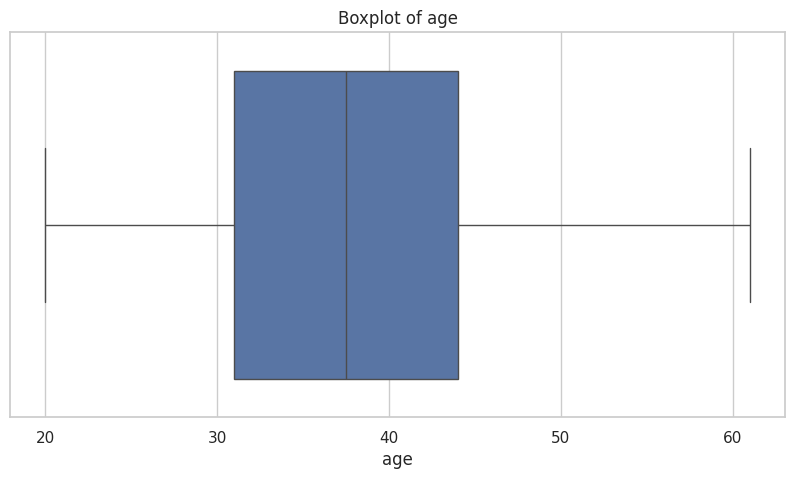

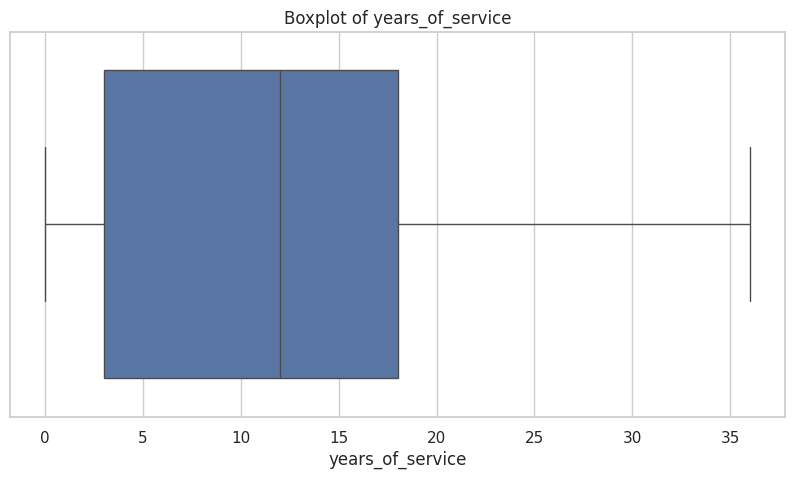

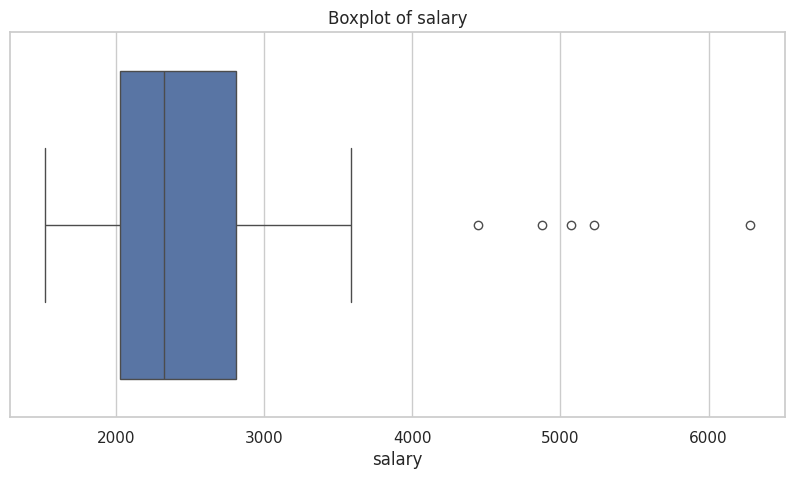

In [ ]:
# Create boxplots for numerical variables
numerical_vars = ['age', 'years_of_service', 'salary']
for var in numerical_vars:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df1[var])
    plt.title(f'Boxplot of {var}')
    plt.xlabel(var)
    plt.show()

#### Observe:
 The boxplot of salary shows outliers for circles beyond the whisker, which means they are unusually high compared to the rest of the salary data. But this is the real outliers or not? Let's analyse later.

## 2.Examine Variable Distributions

###2.1 Identify variable types
Categorical/Qualitative
Numerical/Quantitative

In [ ]:
# Identify variable types
# Initialize lists to store variable names by category
categorical_vars = []
numerical_vars = []

In [ ]:
# Identify variable types and group them
for column in df1.columns:
    if df1[column].dtype == 'object' or df1[column].nunique() < 10:
        categorical_vars.append(column)
    elif df1[column].dtype in ['int64', 'float64']:
        numerical_vars.append(column)

In [ ]:

# Display the grouped variable names
print("Categorical Variables:")
print(categorical_vars)

print("\nNumerical Variables:")
print(numerical_vars)

Categorical Variables:
['gender', 'family', 'education', 'sat_management', 'sat_colleques', 'sat_workingEnvironment', 'sat_salary', 'sat_tasks', 'healtcare', 'holidayCabin', 'gym', 'muscleCare']

Numerical Variables:
['age', 'years_of_service', 'salary']


### 2.2 Analyze and visualize accordingly.
Recall insights from describe().
Review means, standard deviations, and other descriptive statistics.
Use appropriate visualizations:
Bar charts for categorical variables
Histograms for numerical variables
Boxplots, line plots, area charts, pie charts, scatter plots, etc

In [ ]:
df1.describe().round(2)

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
count,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.00
mean,1.23,37.95,1.62,1.99,11.90,2563.88,3.06,4.06,3.22,2.11,3.20,0.57,0.24,0.11,0.27
std,0.42,9.77,0.49,0.84,8.87,849.35,1.06,0.82,1.15,1.11,1.05,0.50,0.43,0.31,0.45
min,1.00,20.00,1.00,1.00,0.00,1521.00,1.00,2.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,1.00,31.00,1.00,1.00,3.00,2027.00,2.00,4.00,3.00,1.00,3.00,0.00,0.00,0.00,0.00
50%,1.00,37.50,2.00,2.00,12.00,2320.00,3.00,4.00,3.00,2.00,3.00,1.00,0.00,0.00,0.00
75%,1.00,44.00,2.00,3.00,18.00,2808.00,4.00,5.00,4.00,3.00,4.00,1.00,0.00,0.00,1.00
max,2.00,61.00,2.00,4.00,36.00,6278.00,5.00,5.00,5.00,5.00,5.00,1.00,1.00,1.00,1.00


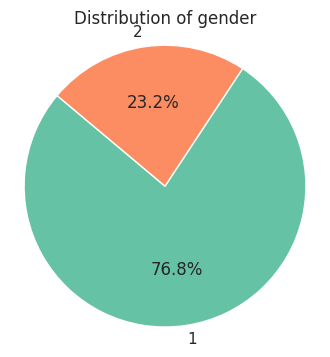

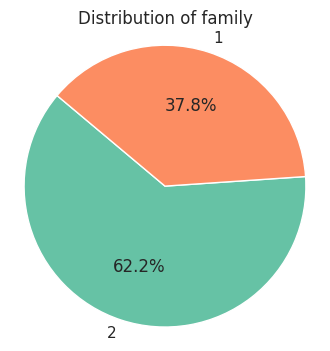

In [ ]:
# distribution of gender and family
categorical_vars = ['gender', 'family']

for var in categorical_vars:
    plt.figure(figsize=(4, 4))

    # Get the counts of each category
    counts = df1[var].value_counts()

    # Create a pie chart
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set2.colors)

    # Set the title and show the plot
    plt.title(f'Distribution of {var}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


In [ ]:
# Distribution of education
df2 = pd.crosstab(df1['education'], 'Count')
df2['%'] = df2['Count'] / df2['Count'].sum() * 100
df2.index = ['Primary school', 'Secondary school', 'Bachelor', 'Master']
df2.columns.name = ''
df2

,Count,%
Primary school,27,32.926829
Secondary school,31,37.804878
Bachelor,22,26.829268
Master,2,2.439024


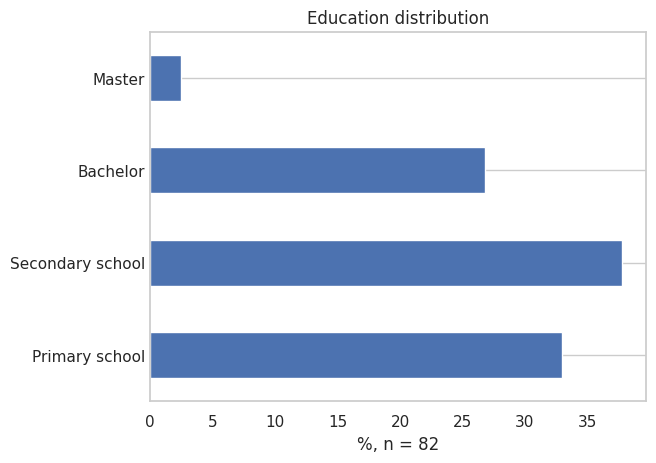

In [ ]:
df2['%'].plot.barh(zorder = 2)

plt.title('Education distribution')

plt.xlabel('%, n = ' + str(df2['Count'].sum()))

plt.grid(axis = 'x')
plt.tick_params(axis = 'y', length = 0)

In [ ]:
# normal charts

sns.set(style="whitegrid")

<ipython-input-218-90202c53d19c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x=var, palette='Set2')


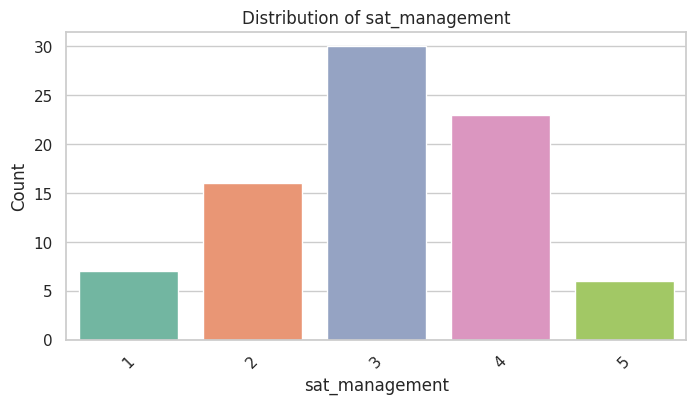

<ipython-input-218-90202c53d19c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x=var, palette='Set2')


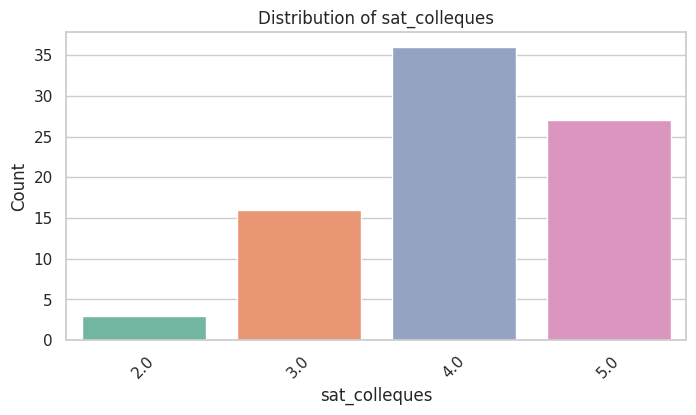

<ipython-input-218-90202c53d19c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x=var, palette='Set2')


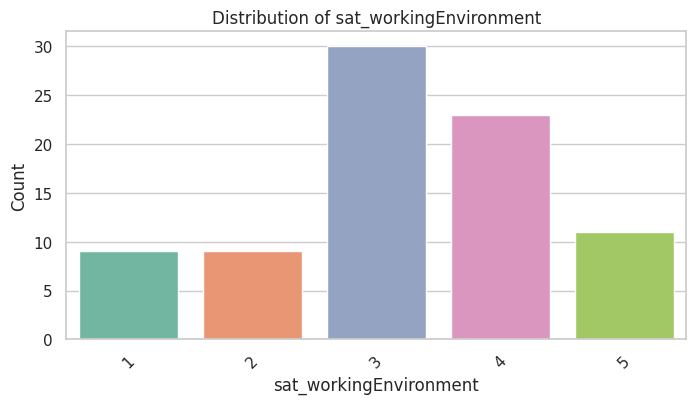

<ipython-input-218-90202c53d19c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x=var, palette='Set2')


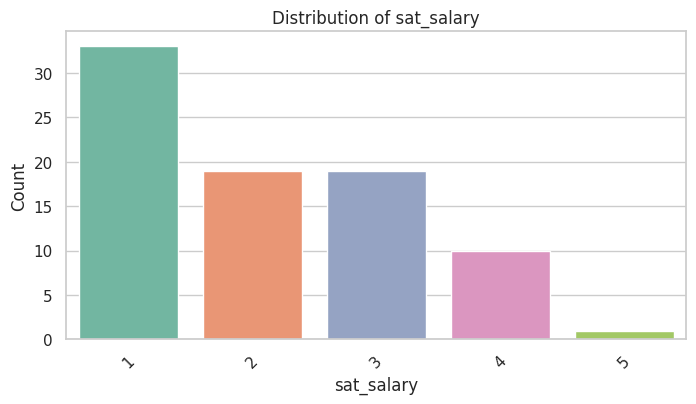

<ipython-input-218-90202c53d19c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x=var, palette='Set2')


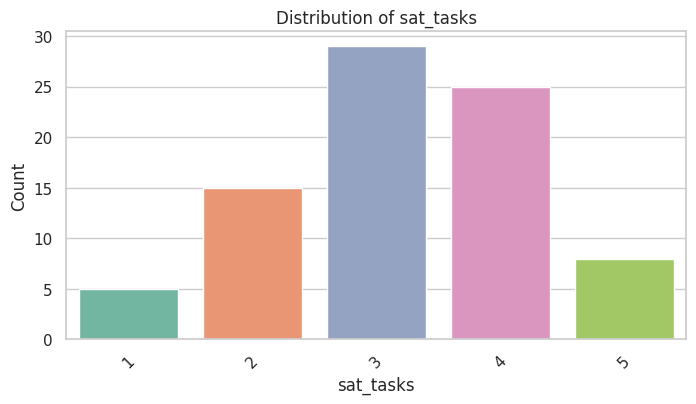

In [ ]:

# Create bar plots for each categorical variable
categorical_vars = ['sat_management', 'sat_colleques', 'sat_workingEnvironment', 'sat_salary', 'sat_tasks']

for var in categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df1, x=var, palette='Set2')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:

categorical_vars = ['sat_management', 'sat_colleques', 'sat_workingEnvironment', 'sat_salary', 'sat_tasks']

# Create bar plots for each categorical variable
for var in categorical_vars:
    plt.figure(figsize=(8, 4))  # Adjusted to a smaller size
    ax = sns.countplot(data=df1, x=var, palette='Set2')

    # Get the current axis limits to set the annotation position
    max_y = ax.get_ylim()[1]

    # Add annotations for scale at the top right corner
    plt.text(x=len(df1[var].value_counts()) - 0.5, y=max_y - 1,
             s='1: very unsatisfied\n5: very satisfied',
             fontsize=10, color='black', ha='right', va='top',
             bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.3'))

    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


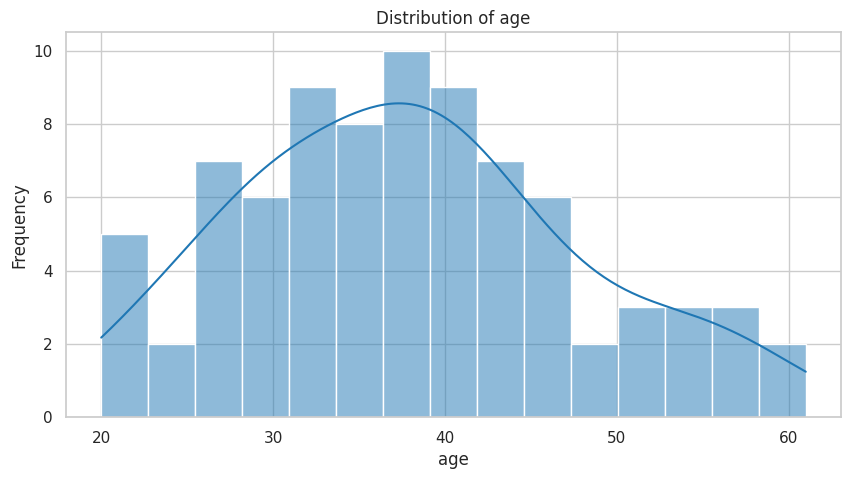

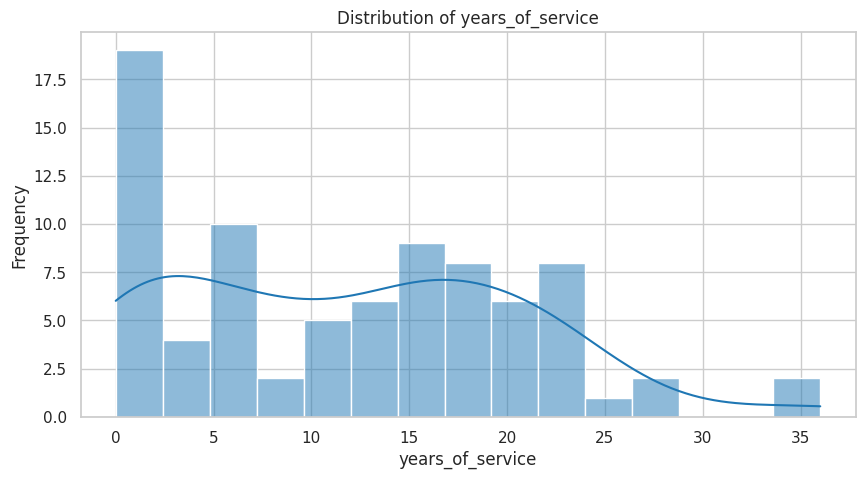

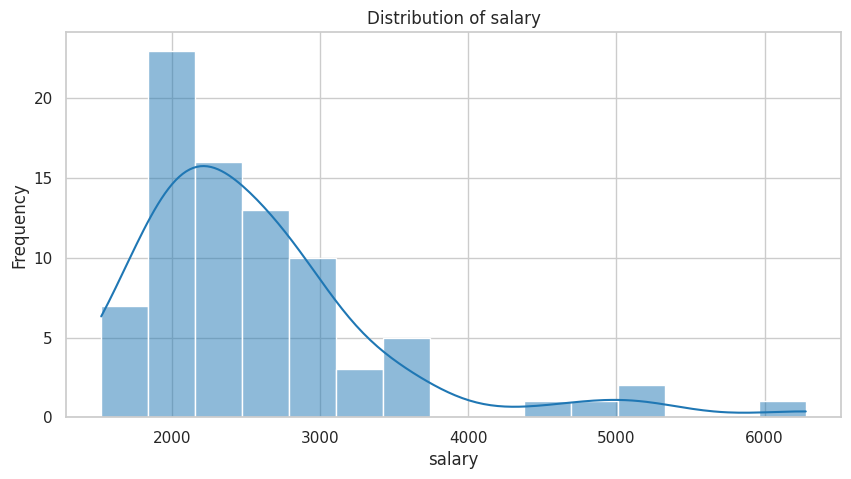

In [ ]:
# Create histograms for numerical variables using kde
numerical_vars = ['age', 'years_of_service', 'salary']

for var in numerical_vars:
    plt.figure(figsize=(10, 5))
    sns.histplot(df1[var], bins=15, kde=True, color='#1f77b4')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

#### Observe:
Distribution of salary is right-skewed, which is common in salary distributions where a majority of people earn lower salaries, and only a few earn significantly higher ones. So outliers in the boxplot may not necessarily be true outliers.


Let's look at salary > 4000

In [ ]:
df_high_salary = df1[df1['salary'] > 4000]
df_high_salary

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
16,1,26,1,4.0,2.0,5225,5,5.0,5,4,5,0.0,0.0,1.0,0.0
21,1,47,2,3.0,17.0,4874,2,4.0,3,2,4,0.0,1.0,0.0,0.0
23,1,36,1,3.0,7.0,4446,3,4.0,3,4,5,0.0,0.0,0.0,0.0
32,1,59,2,3.0,15.0,6278,4,4.0,5,4,4,0.0,1.0,0.0,0.0
66,1,37,2,4.0,8.0,5069,3,4.0,3,2,2,1.0,1.0,0.0,1.0


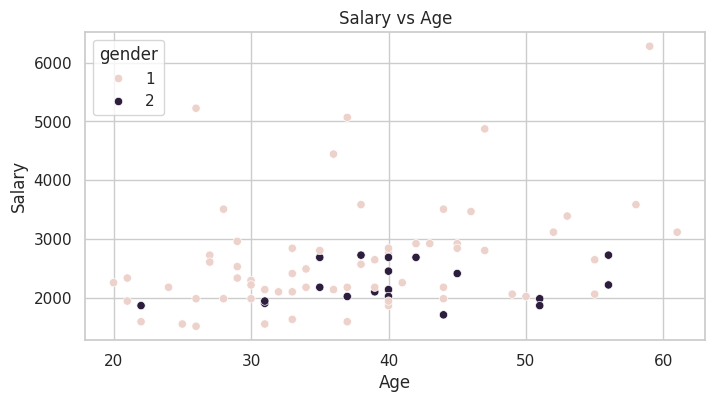

In [ ]:
# Scatter plots for relationships
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df1, x='age', y='salary', hue='gender')
plt.title('Salary vs Age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()


## 3.Categorical Variable
- Use crosstab for frequency and percentage distributions.
Example: pd.crosstab(df['education'], 'Count')
- Calculate percentages manually if necessary.
- Consider creating a named index for rows, and visualize distributions (e.g., bar charts).
- Always show the number of observations in tables/graphs

#### 3.1 Gender and education distribution

In [ ]:
df3 = pd.crosstab(df1['education'], df1['gender'], normalize = 'columns') * 100
df3.index = ['Primary school', 'Secondary school', 'Bachelor', 'Master']
df3.columns = ['Male', 'Female']
df3

,Male,Female
Primary school,34.920635,26.315789
Secondary school,38.095238,36.842105
Bachelor,23.809524,36.842105
Master,3.174603,0.000000


Text(0.5, 1.0, 'Gender and Education Frequency Distribution')

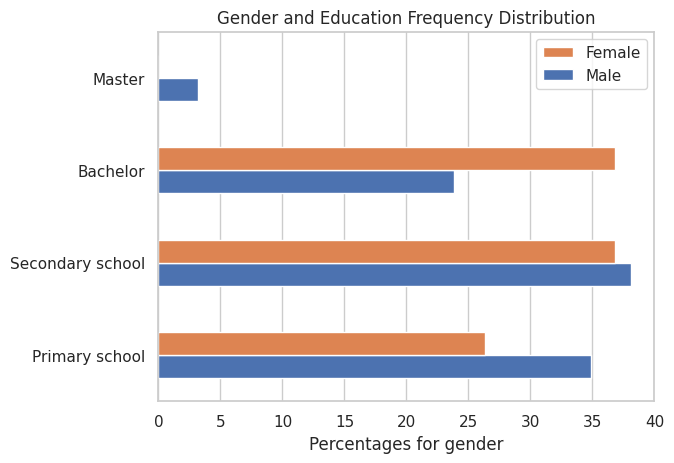

In [ ]:
df3.plot.barh(legend = 'reverse')
plt.xlabel('Percentages for gender')
plt.grid(axis = 'y')
plt.title("Gender and Education Frequency Distribution")



#### 3.2 Gender and sat_salary

In [ ]:
crosstab_gender_salary = pd.crosstab(df1['gender'], df1['sat_salary'], margins=True)

# Calculate percentage distribution
crosstab_percentage = crosstab_gender_salary.div(crosstab_gender_salary.iloc[:, -1], axis=0) * 100

# Display the results
print("Crosstab with Counts:")
print(crosstab_gender_salary)

print("\nCrosstab with Percentages:")
print(crosstab_percentage)

Crosstab with Counts:
sat_salary   1   2   3   4  5  All
gender                            
1           32  12  12   7  0   63
2            1   7   7   3  1   19
All         33  19  19  10  1   82

Crosstab with Percentages:
sat_salary          1          2          3          4         5    All
gender                                                                 
1           50.793651  19.047619  19.047619  11.111111  0.000000  100.0
2            5.263158  36.842105  36.842105  15.789474  5.263158  100.0
All         40.243902  23.170732  23.170732  12.195122  1.219512  100.0


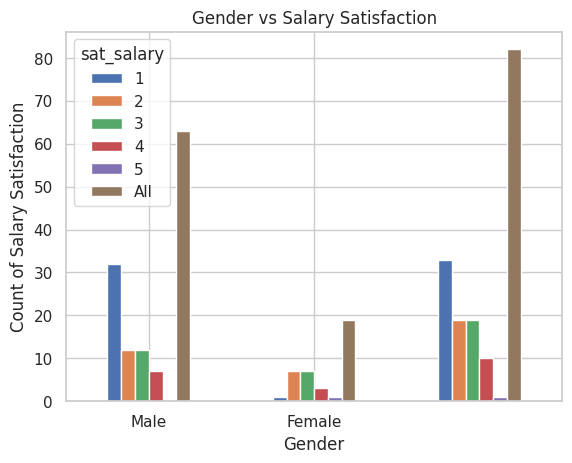

In [ ]:
crosstab_gender_salary.plot(kind='bar', stacked=False)


plt.title('Gender vs Salary Satisfaction')
plt.xlabel('Gender')
plt.ylabel('Count of Salary Satisfaction')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)


plt.show()

## 4.Numerical Variable
- Check min and max values using describe().
- Define bins for classification.
- Visualize this with a histogram
- Calculate frequency and percentage distributions

count    82.000000
mean     37.951220
std       9.773866
min      20.000000
25%      31.000000
50%      37.500000
75%      44.000000
max      61.000000
Name: age, dtype: float64


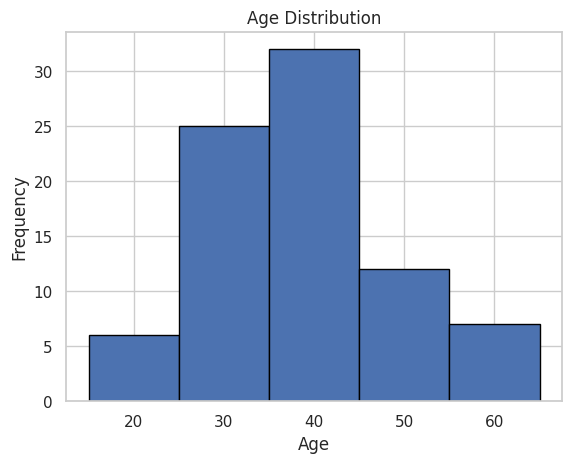

age
15-24     6
25-34    25
35-44    32
45-54    12
55-64     7
Name: count, dtype: int64
age
15-24     7.317073
25-34    30.487805
35-44    39.024390
45-54    14.634146
55-64     8.536585
Name: count, dtype: float64


In [ ]:
age_describe = df1['age'].describe()
print(age_describe)
age_bins = [15, 25, 35, 45, 55, 65]
age_categories = pd.cut(df1['age'], bins=age_bins, labels=['15-24', '25-34', '35-44', '45-54', '55-64'], right=False)
df1['age'].hist(bins=age_bins, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

age_category_distribution = age_categories.value_counts().sort_index()
age_category_percentage = age_category_distribution / len(df) * 100

print(age_category_distribution)
print(age_category_percentage)

count    82.000000
mean     11.902439
std       8.868880
min       0.000000
25%       3.000000
50%      12.000000
75%      18.000000
max      36.000000
Name: years_of_service, dtype: float64


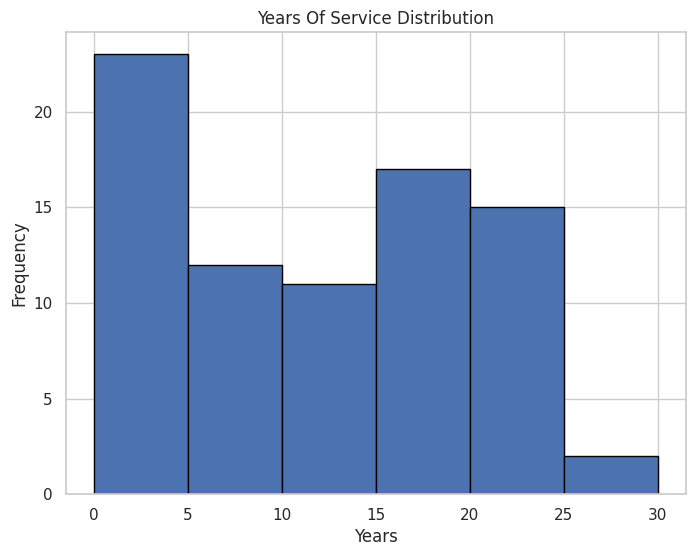

years_of_service
0-4      23
5-9      12
10-14    11
15-19    17
20-24    15
25-29     2
Name: count, dtype: int64
years_of_service
0-4      28.048780
5-9      14.634146
10-14    13.414634
15-19    20.731707
20-24    18.292683
25-29     2.439024
Name: count, dtype: float64


In [ ]:
years_of_service_describe = df1['years_of_service'].describe()
print(years_of_service_describe)
years_bins = [0, 5, 10, 15, 20, 25, 30]
years_categories = pd.cut(df1['years_of_service'], bins=years_bins, labels=['0-4', '5-9', '10-14', '15-19', '20-24','25-29'], right=False)
plt.figure(figsize=(8, 6))
df1['years_of_service'].hist(bins=years_bins, edgecolor='black')
plt.title('Years Of Service Distribution')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.show()
years_category_distribution = years_categories.value_counts().sort_index()
years_category_percentage = years_category_distribution / len(df) * 100

print(years_category_distribution)
print(years_category_percentage)


count      82.000000
mean     2563.878049
std       849.350302
min      1521.000000
25%      2027.000000
50%      2320.000000
75%      2808.000000
max      6278.000000
Name: salary, dtype: float64


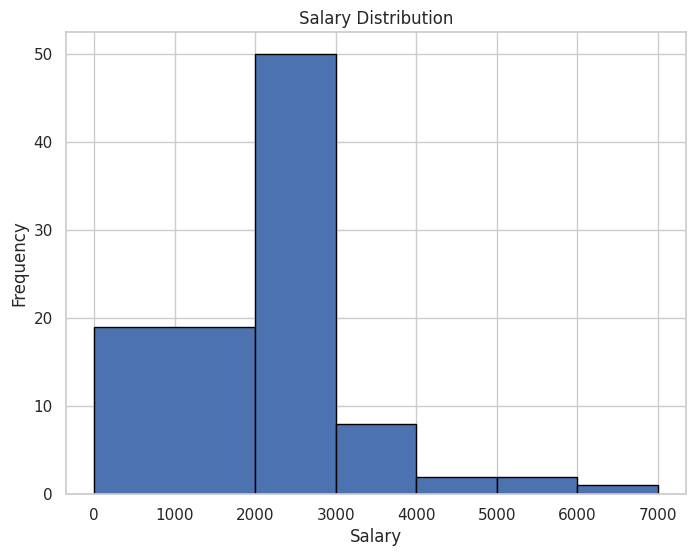

salary
0-1999       19
2000-2999    50
3000-3999     8
4000-4999     2
5000-5999     2
6000-6999     1
Name: count, dtype: int64
salary
0-1999       23.170732
2000-2999    60.975610
3000-3999     9.756098
4000-4999     2.439024
5000-5999     2.439024
6000-6999     1.219512
Name: count, dtype: float64


In [ ]:
salary_describe = df1['salary'].describe()
print(salary_describe)
salary_bins = [0, 2000, 3000, 4000, 5000, 6000, 7000]
salary_categories = pd.cut(df1['salary'], bins=salary_bins, labels=['0-1999', '2000-2999', '3000-3999', '4000-4999', '5000-5999','6000-6999'], right=False)
plt.figure(figsize=(8, 6))
df1['salary'].hist(bins=salary_bins, edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()
salary_category_distribution = salary_categories.value_counts().sort_index()
salary_category_percentage = salary_category_distribution / len(df) * 100

print(salary_category_distribution)
print(salary_category_percentage)


## 5.Analyzing Two Variables

##### Is there any relationship between 2 variables:
- Gender and salary? (no relation)
- Gender and education level (no relation)
- Years of working and salary? (related)
- Education and salary
- How about the group use service. Do they work more efficient and get more salary
- How about the group not use service. Is there any relation with their satisfactory

In [ ]:
# Relationship btw Gender and Salary
df2 = df1.groupby('gender')['salary'].describe()[['mean', 'std', 'count']]
df2.index=['men','women']
df2


,mean,std,count
men,2663.746032,930.061860,63.0
women,2232.736842,340.780451,19.0


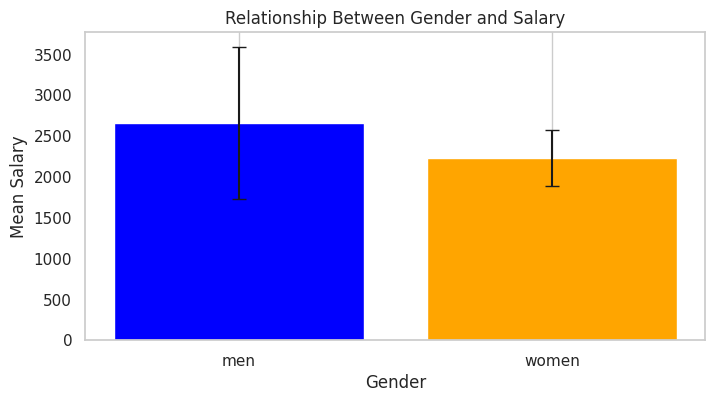

In [ ]:

# Group by gender and calculate the salary statistics
df2 = df1.groupby('gender')['salary'].describe()[['mean', 'std', 'count']]
df2.index = ['men', 'women']

# Set up the figure and axis
plt.figure(figsize=(8, 4))

# Create a bar plot for mean salary with error bars for standard deviation
plt.bar(df2.index, df2['mean'], yerr=df2['std'], capsize=5, color=['blue', 'orange'])

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Mean Salary')
plt.title('Relationship Between Gender and Salary')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')

# Display the plot
plt.show()

##### Observe: Relationship btw Gender and Salary?
 It seems like men have higher salary than women base on average salary. This is because the sample is too small, not present for the whole population? Is there any relation between gender and salary? Let's use t-test.
- The null hypothesis (H₀): There is no difference in the mean salary between men and women.
- The alternative hypothesis (H₁): There is a difference in the mean salary between men and women.

In [ ]:
import scipy.stats as stats

# df1 contains  salary data with gender column
men_salary = df1[df1['gender'] == 1]['salary'] # male
women_salary = df1[df1['gender'] == 2]['salary'] # female

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(men_salary, women_salary)

# Display the results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 1.973154360871348, P-value: 0.05193147839152632


##### Observe: No relationship btw Gender and Salary
  Since the p-value is slightly above 0.05 (0.0519) --> fail to reject the null hypothesis. The difference in mean salaries between men and women is not statistically significant at the 5% significance level.
  The test results suggest that the observed difference in salaries between men and women could be due to random chance.

In [ ]:
# Relationship btw Gender and Education level
df3 = pd.crosstab(df['education'], df1['gender'], normalize = 'columns') * 100
df3.index = ['Primary school', 'Secondary school graduate', 'bachelor level', 'master level']
df3.columns = ['woman', 'man']
df3.loc['Total'] = df3.sum()
df3

,woman,man
Primary school,35.483871,26.315789
Secondary school graduate,37.096774,36.842105
bachelor level,24.193548,36.842105
master level,3.225806,0.000000
Total,100.000000,100.000000


##### Observe: Relationship btw Gender and Education level?
 It seems like man have a higher level of education overall, with a larger proportion of people having a bachelor's degree and a lower proportion having only primary school education. Let's use chi-square test to assess whether the distribution of education levels is significantly different between the two groups.
- Null Hypothesis (H₀): The distribution of education levels is the same between the two groups.
- Alternative Hypothesis (H₁): The distribution of education levels differs between the two groups.

In [ ]:
from scipy.stats import chi2_contingency


chi2_contingency(df3)

Chi2ContingencyResult(statistic=7.2079727301532035, pvalue=0.12529756686304933, dof=4, expected_freq=array([[ 30.89983022,  30.89983022],
       [ 36.96943973,  36.96943973],
       [ 30.51782683,  30.51782683],
       [  1.61290323,   1.61290323],
       [100.        , 100.        ]]))

##### Observe: No Relationship btw Gender and Education level
Since the p-value = 0.1253 (which is greater than 0.05), --> fail to reject H₀. The data suggests that there is no significant difference in education levels between the 2 groups.

In [ ]:
from sklearn.linear_model import LinearRegression

# Relation btw'years_of_service' and 'salary'
X = df1[['years_of_service']]  # Independent variable (years_of_service)
y = df1['salary']  # Dependent variable (salary)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the slope (a) and intercept (b)
a = model.coef_[0]  # Slope
b = model.intercept_  # Intercept

# Display the results
print(f"Slope (a): {a}")
print(f"Intercept (b): {b}")

Slope (a): 23.821032080238897
Intercept (b): 2280.3496669474007


##### Observe:  Relationship bwt salary and year_of_ working?
We have relationship bwt salary and year_of_ working as [salary] = 23.82[year_of_working] + 2280.349.
- We can see that individual gains more years of experience, their salary tends to increase.
- The slope value (23.82) is relatively small, which suggests that while experience does lead to higher salary, the increase per year of experience may not be substantial. However, even a small increase can accumulate significantly over many years.

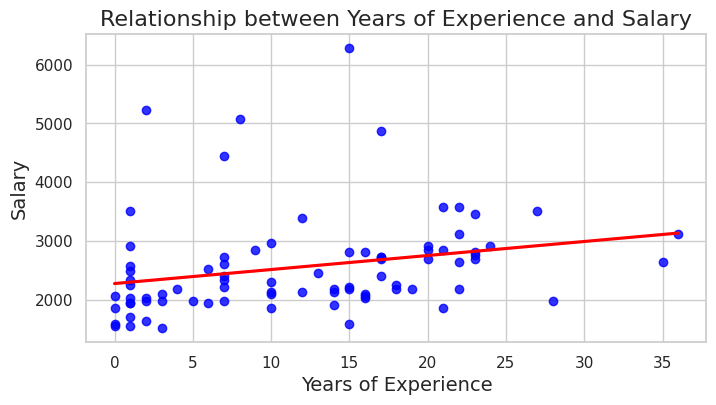

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 is your DataFrame with 'years_of_service' and 'salary' columns

# Create a scatter plot with regression line
plt.figure(figsize=(8, 4))
sns.regplot(x='years_of_service', y='salary', data=df1,
            scatter_kws={'color': 'blue'}, line_kws={'color': 'red'},
            marker='o', ci=None)

# Add titles and labels
plt.title('Relationship between Years of Experience and Salary', fontsize=16)
plt.xlabel('Years of Experience', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.grid(True)

# Show plot
plt.show()


#### Observe: Yes, there is relationship between years of experience and salary
This plot shows a weak positive relationship between years of experience and salary, with significant variability. Although there is a trend of increasing salary with experience, the wide spread of the data points suggests that other factors likely affect salary as well.

In [ ]:
import statsmodels.api as sm


X = df1['years_of_service']  # Independent variable
y = df1['salary']  # Dependent variable

# Add a constant to X for the intercept (b)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the summary of the model
print(model.summary())

# Extract the p-value for the slope
p_value = model.pvalues['years_of_service']

print(f"P-value for the coefficient of years of experience: {p_value}")


                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     5.276
Date:                Sat, 26 Oct 2024   Prob (F-statistic):             0.0242
Time:                        09:03:59   Log-Likelihood:                -666.28
No. Observations:                  82   AIC:                             1337.
Df Residuals:                      80   BIC:                             1341.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2280.3497    153.599  

## 6.Conclusion

* Majority of employees are male, with secondary education as the most common level.

* Salary satisfaction is generally low, especially among males, though higher degrees correlate with higher earnings.

* Statistical analysis shows:

  * No significant gender difference in salary or education levels.

  * A modest positive correlation between experience and salary.

* Findings suggest opportunities to enhance satisfaction and equity in the workplace.